In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Death.csv')

In [4]:
df

,Entity,Code,Year,Meningitis fatalities\n\n\n\n\n\n,Dementia fatalities\n\n\n\n\n\n,Parkinson s fatalities\n\n\n\n\n\n,Nutritional deficiency fatalities\n\n\n\n\n\n,Malaria fatalities\n\n\n\n\n\n,Drowning fatalities\n\n\n\n\n\n,Interpersonal violence fatalities\n\n\n\n\n\n,...,Chronic kidney fatalities\n\n\n\n\n\n,Poisoning fatalities\n\n\n\n\n\n,Protein energy malnutrition fatalities\n\n\n\n\n\n,Road injury fatalities\n\n\n\n\n\n,Chronic respiratory fatalities\n\n\n\n\n\n,Chronic liver fatalities\n\n\n\n\n\n,Digestive disease fatalities\n\n\n\n\n\n,Fire fatalities\n\n\n\n\n\n,Acute hepatitis fatalities,Measles fatalities
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,10037
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,10021
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,3776,386,2404,5106,6223,2830,5335,360,3325,9807
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,3862,425,2797,5681,6445,2943,5568,396,3601,10228
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,3932,451,3038,6001,6664,3027,5739,420,3816,12144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,2108,381,2990,2373,2751,1956,4202,632,146,720
6836,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,2160,393,3027,2436,2788,1962,4264,648,146,432
6837,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,2196,398,2962,2473,2818,2007,4342,654,144,307
6838,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,2240,400,2890,2509,2849,2030,4377,657,139,402


In [5]:
# Remove '\n\n\n\n\n\n' from column names

df.columns = df.columns.str.replace('\n\n\n\n\n\n', '')

In [7]:
df.head(2)

,Entity,Code,Year,Meningitis fatalities,Dementia fatalities,Parkinson s fatalities,Nutritional deficiency fatalities,Malaria fatalities,Drowning fatalities,Interpersonal violence fatalities,...,Chronic kidney fatalities,Poisoning fatalities,Protein energy malnutrition fatalities,Road injury fatalities,Chronic respiratory fatalities,Chronic liver fatalities,Digestive disease fatalities,Fire fatalities,Acute hepatitis fatalities,Measles fatalities
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,3709,338,2054,4154,5945,2673,5005,323,2985,10037
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,3724,351,2119,4472,6050,2728,5120,332,3092,10021


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Entity                                  6840 non-null   object
 1   Code                                    6840 non-null   object
 2   Year                                    6840 non-null   int64 
 3   Meningitis fatalities                   6840 non-null   int64 
 4   Dementia fatalities                     6840 non-null   int64 
 5   Parkinson s fatalities                  6840 non-null   int64 
 6   Nutritional deficiency fatalities       6840 non-null   int64 
 7   Malaria fatalities                      6840 non-null   int64 
 8   Drowning fatalities                     6840 non-null   int64 
 9   Interpersonal violence fatalities       6840 non-null   int64 
 10  Maternal disorder fatalities            6840 non-null   int64 
 11  HIV/

In [9]:
df.shape

(6840, 35)

In [10]:
# Find unique entities in the 'Entity' column

unique_entities = df['Entity'].unique()

print("Different entities in the 'Entity' column:")
print(unique_entities)

Different entities in the 'Entity' column:
['Afghanistan' 'African Region who' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' 'Cote dIvoire' 'Croatia'
 'Cuba' 'Cyprus' 'Czechia' 'Democratic Republic of Congo' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Asia & Pacific wb'
 'East Timor' 'Eastern Mediterranean Region who' 'Ecuador' 'Egypt'
 'El Salvador' 'England' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Eswatini' 'Ethiopia' 'Europe & Central Asia wb' 'European Region who'
 'Fiji' 'Finland' 'France' 'G20' 'Gabon' 'Gambia' 'Georgia' 'G

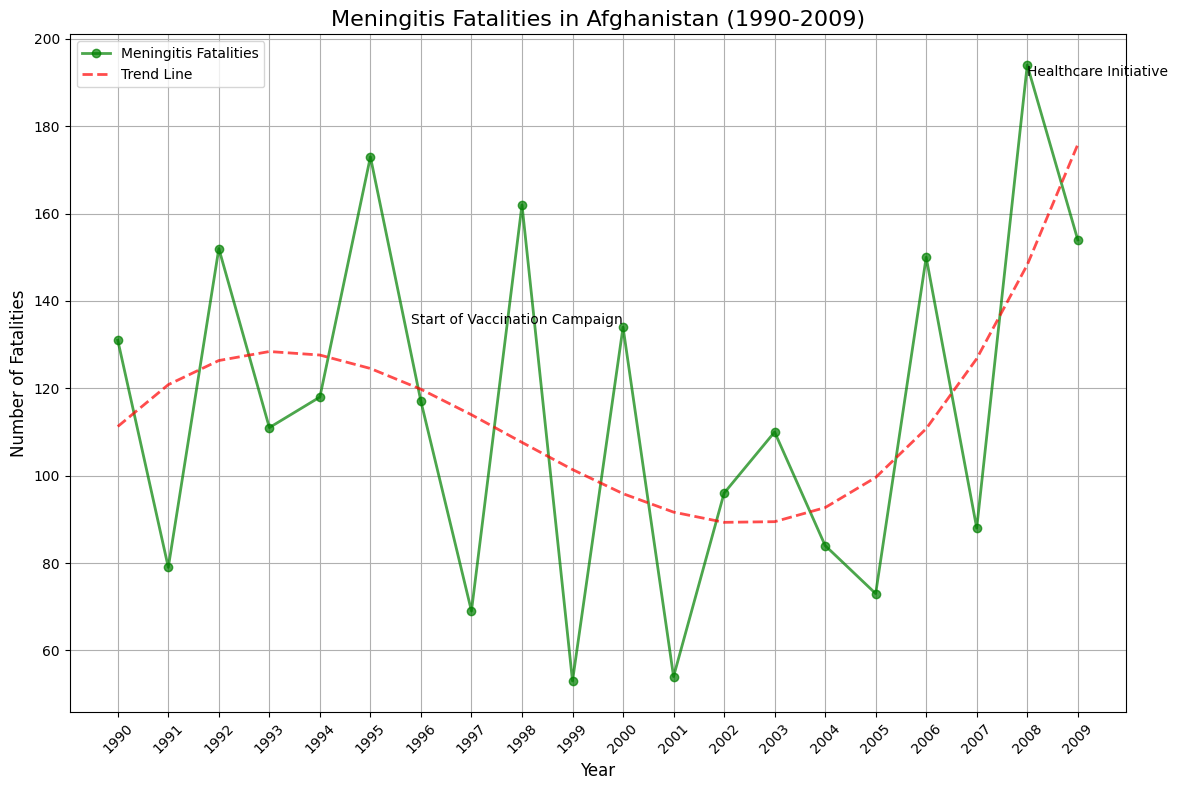

In [16]:
years = np.arange(1990, 2010)
fatalities = np.random.randint(50, 200, size=years.shape)

plt.figure(figsize=(12, 8))
plt.plot(years, fatalities, marker='o', color='green', linestyle='-', linewidth=2, alpha=0.7, label='Meningitis Fatalities')

z = np.polyfit(years, fatalities, 3)
p = np.poly1d(z)

plt.plot(years, p(years), color='red', linestyle='--', linewidth=2, alpha=0.7, label='Trend Line')
plt.text(years[10], fatalities[10], 'Start of Vaccination Campaign', fontsize=10, ha='right', va='bottom')
plt.text(years[18], fatalities[18], 'Healthcare Initiative', fontsize=10, ha='left', va='top')
plt.title('Meningitis Fatalities in Afghanistan (1990-2009)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fatalities', fontsize=12)
plt.xticks(years, rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# "Fatalities Due to Meningitis in Afghanistan (1990-2009)"

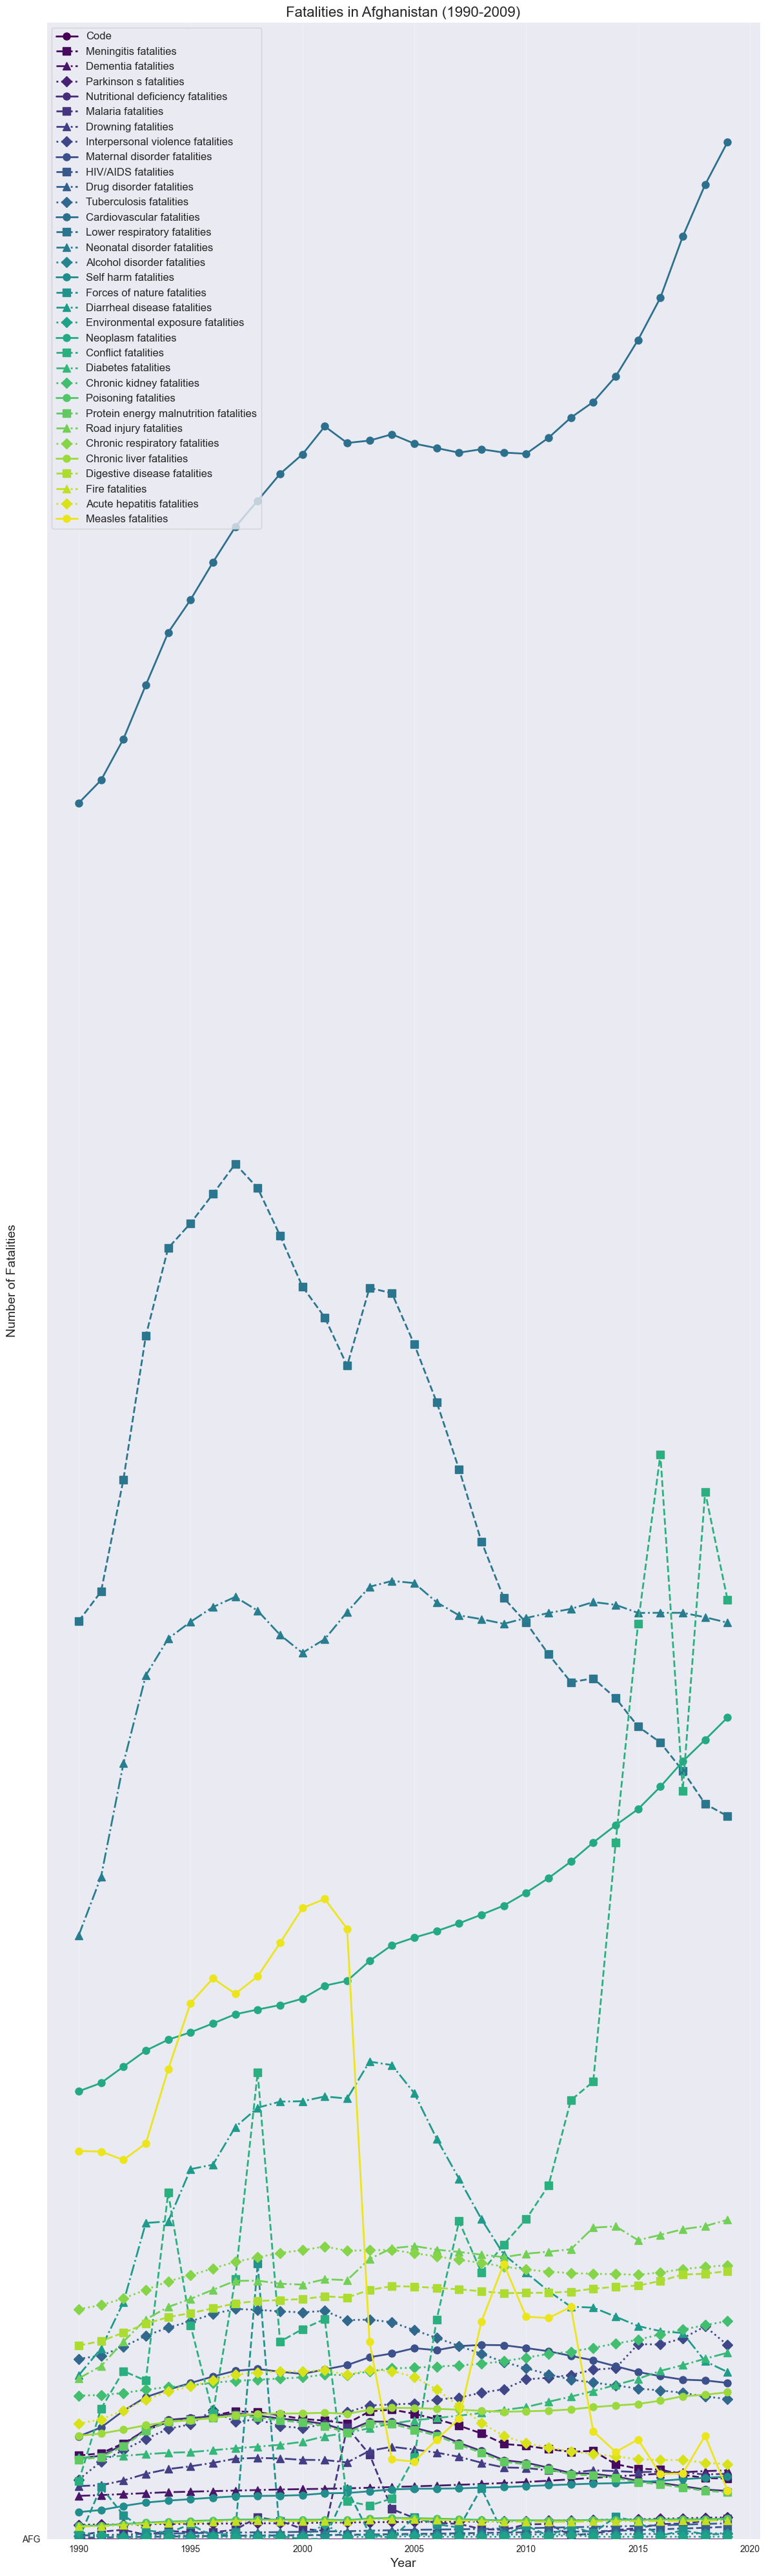

In [31]:
import seaborn as sns

sns.set_style("darkgrid")

plt.figure(figsize=(12, 40))

line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']
for i, column in enumerate(afghanistan_fatalities.columns):
    color = plt.cm.viridis(i / float(len(afghanistan_fatalities.columns)))
    style = line_styles[i % len(line_styles)]
    marker = markers[i % len(markers)]
    plt.plot(afghanistan_df['Year'], afghanistan_fatalities[column], label=column, color=color, linestyle=style, marker=marker, markersize=8, linewidth=2)

plt.title('Fatalities in Afghanistan (1990-2009)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(0, None)
plt.tight_layout()
plt.show()


# "Global fatalities categorized by cause"

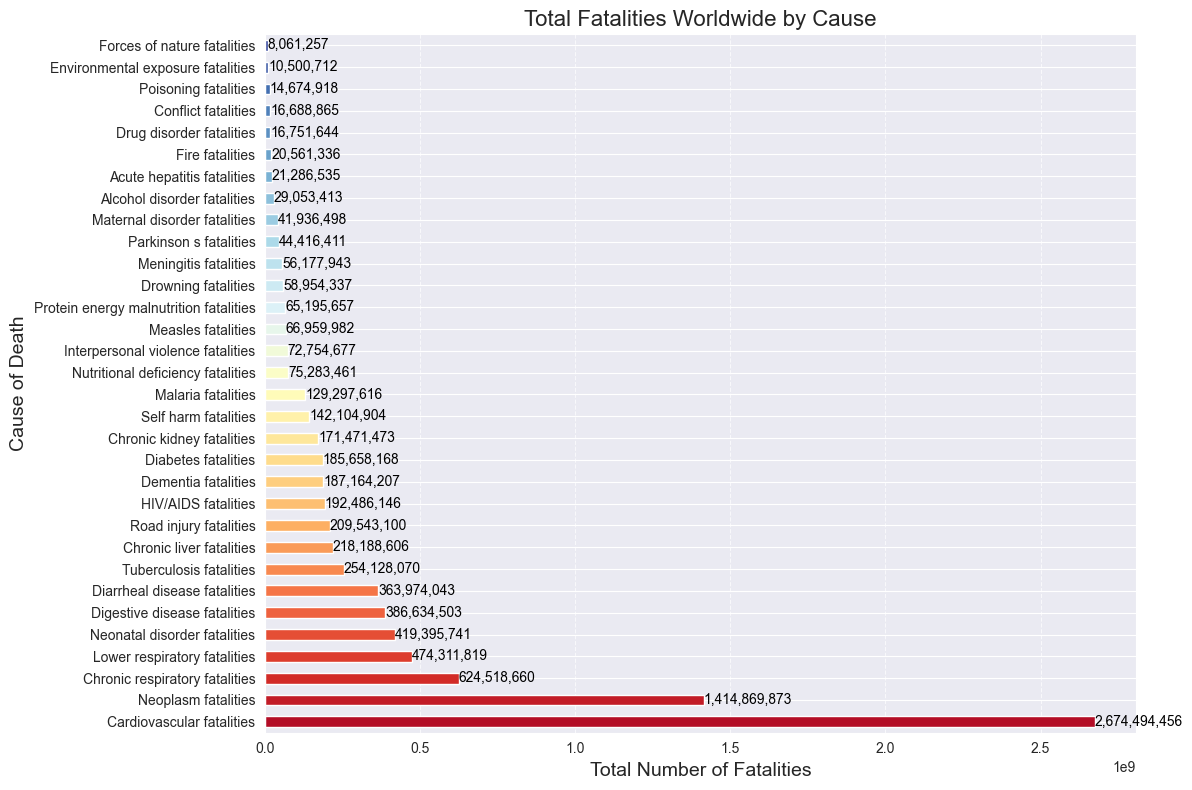

In [38]:
# Drop unnecessary columns
df_cleaned = df.drop(columns=['Entity', 'Code', 'Year'])

# Group by cause of death and sum across all entities
total_deaths_by_cause = df_cleaned.groupby(level=0).sum()

# Sort the DataFrame by the total number of fatalities for each cause
total_deaths_by_cause_sorted = total_deaths_by_cause.sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))

colors = sns.color_palette("RdYlBu", len(total_deaths_by_cause_sorted))

# Plot the sorted data
total_deaths_by_cause_sorted.plot(kind='barh', color=colors)
for i, v in enumerate(total_deaths_by_cause_sorted):
    plt.text(v, i, f'{v:,.0f}', color='black', va='center')

plt.title('Total Fatalities Worldwide by Cause', fontsize=16)
plt.xlabel('Total Number of Fatalities', fontsize=14)
plt.ylabel('Cause of Death', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# "Top 10 countries with the highest number of cardiovascular fatalities"

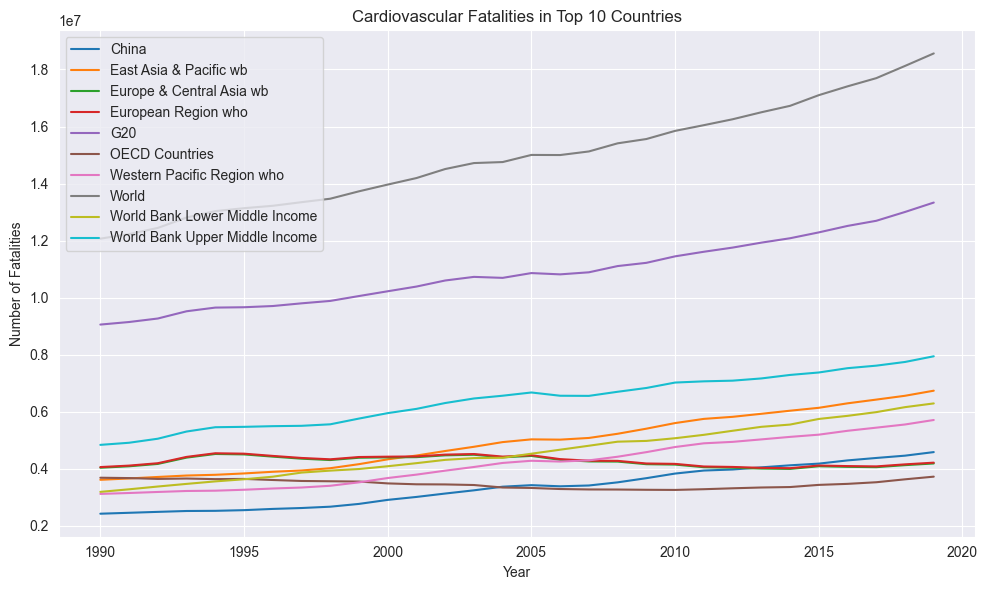

In [41]:
# Filter data for Cardiovascular fatalities
cardiovascular_df = df[['Entity', 'Year', 'Cardiovascular fatalities']]

# Group by country and year, and sum the fatalities
cardiovascular_by_country_year = cardiovascular_df.groupby(['Entity', 'Year']).sum().reset_index()

# Get the top 10 countries based on the highest number of Cardiovascular fatalities each year
top_10_countries = cardiovascular_by_country_year.groupby('Entity')['Cardiovascular fatalities'].sum().nlargest(10).index

# Filter data for the top 10 countries
top_10_data = cardiovascular_by_country_year[cardiovascular_by_country_year['Entity'].isin(top_10_countries)]

plt.figure(figsize=(10, 6))
for country, group in top_10_data.groupby('Entity'):
    plt.plot(group['Year'], group['Cardiovascular fatalities'], label=country)

plt.title('Cardiovascular Fatalities in Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# "Examine homicides and suicides in India and the USA"

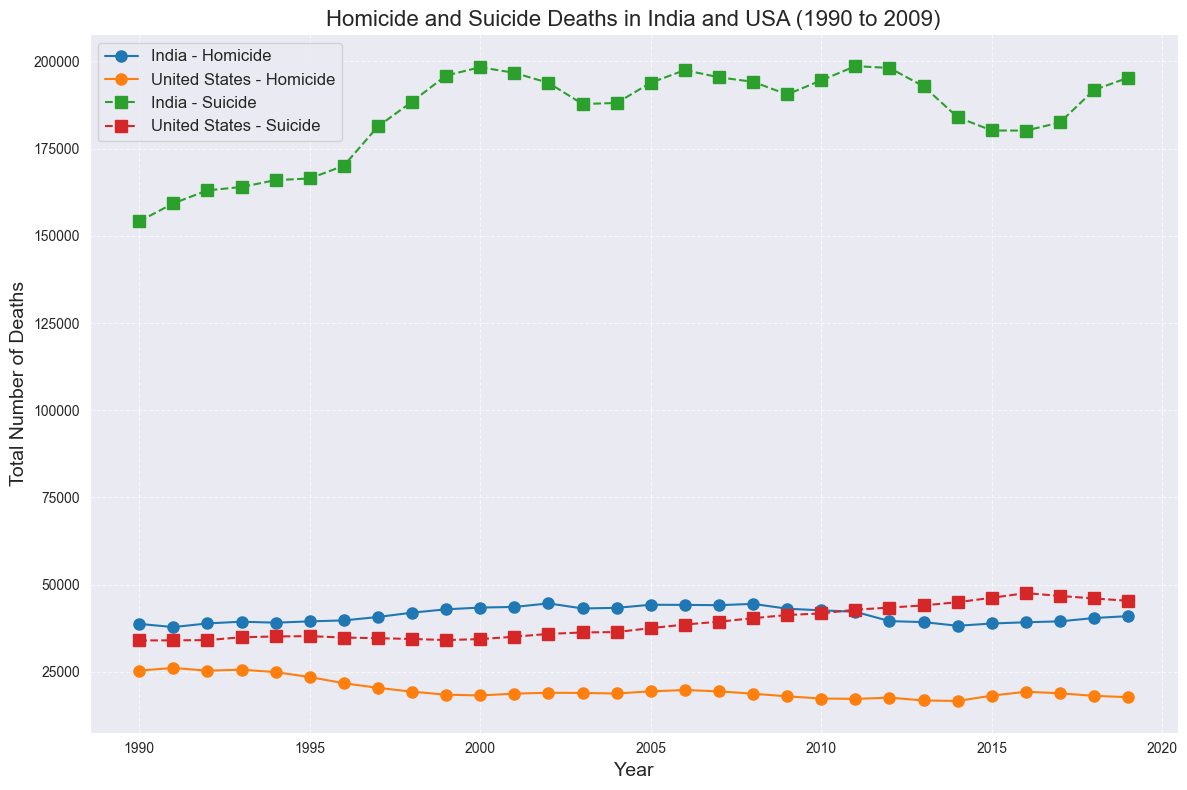

In [44]:
plt.figure(figsize=(12, 8))

for country in ['India', 'United States']:
    homicide_data = total_deaths_by_country_year.loc[country, 'Interpersonal violence fatalities']
    plt.plot(homicide_data.index, homicide_data.values, label=country + ' - Homicide', linestyle='-', marker='o', markersize=8)

for country in ['India', 'United States']:
    suicide_data = total_deaths_by_country_year.loc[country, 'Self harm fatalities']
    plt.plot(suicide_data.index, suicide_data.values, label=country + ' - Suicide', linestyle='--', marker='s', markersize=8)

plt.title('Homicide and Suicide Deaths in India and USA (1990 to 2009)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Number of Deaths', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# "Analyze interpersonal violence fatalities spatially"

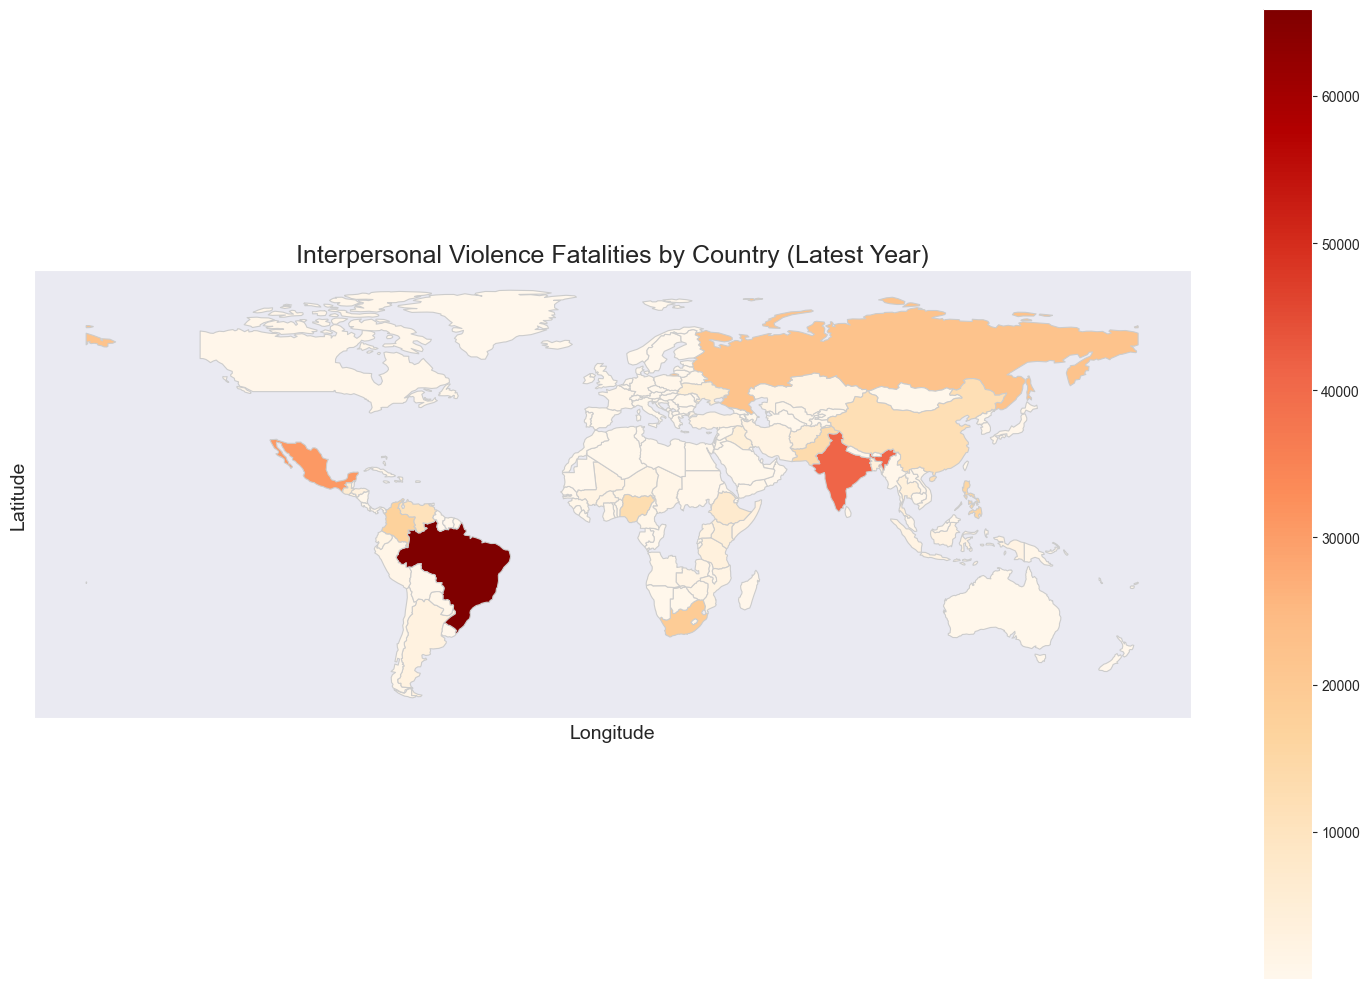

In [54]:
import geopandas as gpd

# Load a shapefile containing the boundaries of countries or regions
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter the mortality data to include only the most recent year
latest_year_data = df[df['Year'] == df['Year'].max()]

# Merge the mortality data with the shapefile based on country names
merged_data = world.merge(latest_year_data, how='left', left_on='name', right_on='Entity')

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Interpersonal violence fatalities', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Interpersonal Violence Fatalities by Country (Latest Year)', fontsize=18)
ax.set_xlabel('Longitude', fontsize=14)
ax.set_ylabel('Latitude', fontsize=14)
legend = ax.get_legend()
if legend:
    legend.set_title('Fatalities')
    for label in legend.get_texts():
        label.set_fontsize(12)

ax.set_xticks([])
ax.set_yticks([])
plt.tight_layout()
plt.show()